In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')
df.shape

(41188, 21)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
conversion        41188 non-null int64
dtypes: floa

In [6]:
df['conversion'] = df['y'].apply(lambda x: 1 if x =='yes' else 0)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [12]:
print("total conversion: %i out of %i" % (df['conversion'].sum(),df.shape[0]))
print("conversion rate",df['conversion'].sum()/df.shape[0])

total conversion: 4640 out of 41188
conversion rate 0.11265417111780131


In [29]:
conversion = df.groupby(['campaign']).agg({'conversion': ['count', 'sum',
                                            ]}).reset_index()
conversion['rate'] = 100*conversion['conversion']['sum']/conversion['conversion']['count']

In [33]:
conversion.sort_values('rate', ascending=False).head(10)

campaign conversion             rate
                 count   sum           
0         1      17642  2300  13.037071
1         2      10570  1211  11.456954
2         3       5341   574  10.747051
3         4       2651   249   9.392682
5         6        979    75   7.660878
4         5       1599   120   7.504690
16       17         58     4   6.896552
10       11        177    12   6.779661
22       23         16     1   6.250000
6         7        629    38   6.041335

Text(0.5, 1.0, 'Conversion Rates by number of Contacts')

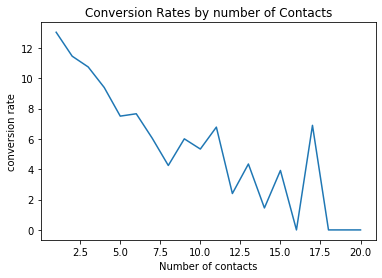

In [37]:
temp = conversion[:20]
plt.plot(temp['campaign'],temp['rate'])
plt.xlabel("Number of contacts")
plt.ylabel("conversion rate")
plt.title("Conversion Rates by number of Contacts")

In [38]:
conversion_by_age = df.groupby(['age']).agg({'conversion': ['count', 'sum',
                                            ]}).reset_index()
conversion_by_age['rate'] = 100*conversion_by_age['conversion']['sum']/conversion_by_age['conversion']['count']

In [39]:
conversion_by_age

age conversion            rate
            count sum            
0   17          5   2   40.000000
1   18         28  12   42.857143
2   19         42  20   47.619048
3   20         65  23   35.384615
4   21        102  29   28.431373
..  ..        ...  ..         ...
73  91          2   0    0.000000
74  92          4   3   75.000000
75  94          1   0    0.000000
76  95          1   0    0.000000
77  98          2   2  100.000000

[78 rows x 4 columns]

Text(0.5, 1.0, 'Conversion Rates by Age')

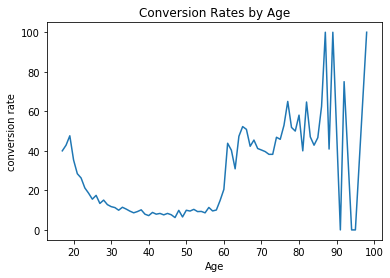

In [41]:
plt.plot(conversion_by_age['age'],conversion_by_age['rate'])
plt.xlabel("Age")
plt.ylabel("conversion rate")
plt.title("Conversion Rates by Age")

In [52]:
df.loc[df['age'].between(0,29), 'AgeGroup'] = '18-30'
df.loc[df['age'].between(30,39), 'AgeGroup'] = '30-40'
df.loc[df['age'].between(40,49), 'AgeGroup'] = '40-50'
df.loc[df['age'].between(50,59), 'AgeGroup'] = '50-60'
df.loc[df['age'].between(60,69), 'AgeGroup'] = '60-70'
df.loc[df['age'].between(70,100), 'AgeGroup'] = '70+'

In [60]:
conversion_by_agegroup = df.groupby(['AgeGroup']).agg({'conversion': ['count','sum']}).reset_index()
conversion_by_agegroup['rate'] = 100*conversion_by_agegroup['conversion']['sum']/conversion_by_agegroup['conversion']['count']

In [61]:
conversion_by_agegroup

AgeGroup conversion             rate
                count   sum           
0    18-30       5669   922  16.263891
1    30-40      16938  1715  10.125162
2    40-50      10526   834   7.923238
3    50-60       6862   697  10.157389
4    60-70        724   251  34.668508
5      70+        469   221  47.121535

Text(0.5, 1.0, 'Conversion Rates by Age Group')

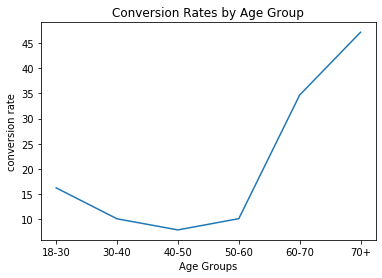

In [62]:
plt.plot(conversion_by_agegroup['AgeGroup'],conversion_by_agegroup['rate'])
plt.xlabel("Age Groups")
plt.ylabel("conversion rate")
plt.title("Conversion Rates by Age Group")

In [73]:
conversion_by_marital = pd.pivot_table(df,values='y',index='marital',
               columns='conversion', aggfunc=len)

conversion_by_marital.columns = ['non_conversions', 'conversions']

In [74]:
conversion_by_marital

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


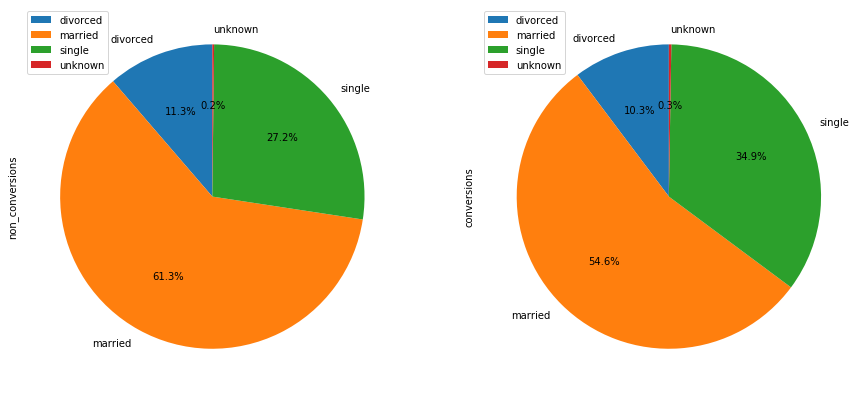

In [75]:
conversion_by_marital.plot(kind='pie',figsize=(15,7),
                          startangle=90,subplots=True,
                           autopct=lambda x: '%0.1f%%' % x)
plt.show()

In [83]:
conversion_by_education = pd.pivot_table(df, values='y', columns= 'conversion',index='education', aggfunc=len)
conversion_by_education.columns = ['non-conversions', 'conversions']

In [84]:
conversion_by_education

,non-conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


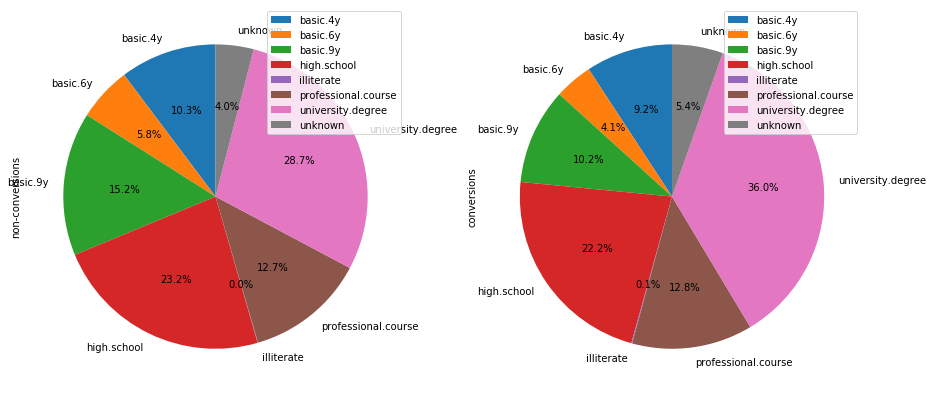

In [85]:
conversion_by_education.plot(kind='pie',figsize=(15,7),
                          startangle=90,subplots=True,
                           autopct=lambda x: '%0.1f%%' % x)
plt.show()

In [87]:
df.groupby(['conversion'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [90]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True),
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

In [92]:
duration_df.columns = ['conversion','non_conversion']
duration_df = duration_df/ (60*60)

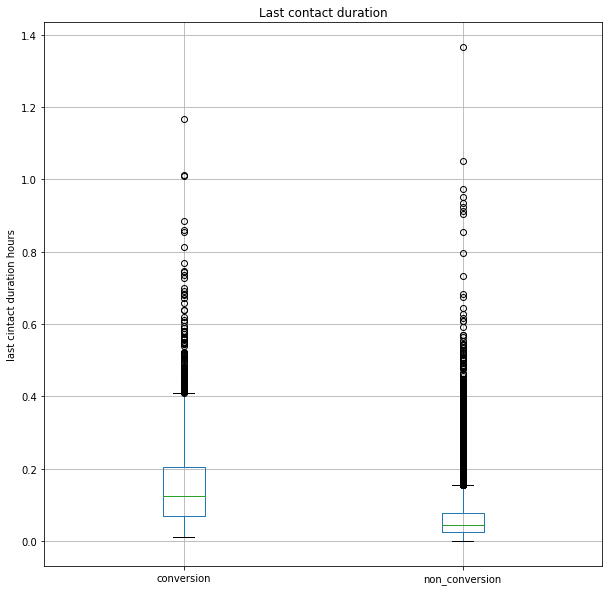

In [94]:
ax = duration_df.plot(kind='box',grid=True, figsize=(10,10))
ax.set_ylabel('last cintact duration hours')
ax.set_title('Last contact duration')
plt.show()

In [102]:
age_marital_df = df.groupby(['AgeGroup','marital'])['conversion'].sum().unstack('marital').fillna(0)

In [103]:
age_marital_df

marital,divorced,married,single,unknown
AgeGroup,,,,
18-30,12.0,158.0,751.0,1.0
30-40,128.0,897.0,684.0,6.0
40-50,126.0,575.0,130.0,3.0
50-60,119.0,533.0,44.0,1.0
60-70,27.0,218.0,5.0,1.0
70+,64.0,151.0,6.0,0.0


In [114]:
age_marital_df = age_marital_df.divide(df.groupby('AgeGroup')['conversion'].count(),axis=0)

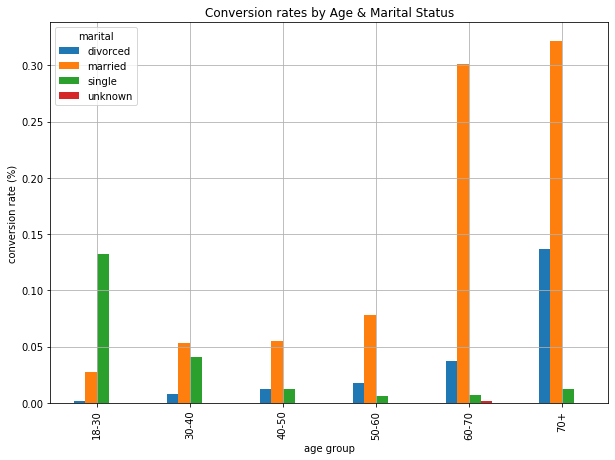

In [115]:
ax = age_marital_df.plot(kind='bar', grid=True, figsize=(10,7))
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

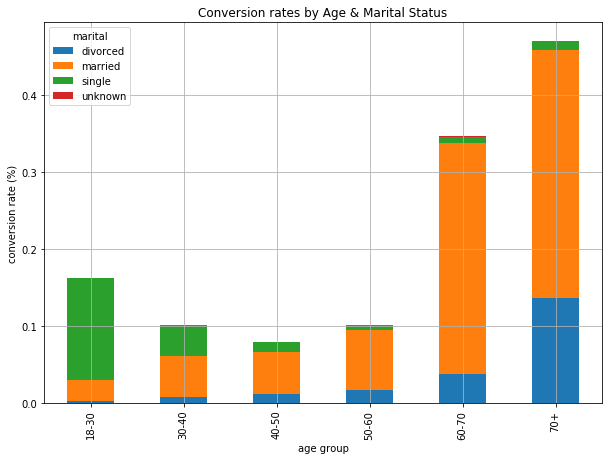

In [116]:
ax = age_marital_df.plot(kind='bar', grid=True, stacked=True, figsize=(10,7))
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()